# Introduction

## About

Image classifier that recognizes different Brazilian Jiu Jitsu grappling positions and predicts future outcomes! Uses a sequential neural network trained on a dataset of mounts/guards/submissions/areas of control to label the most resembled situation and a decision tree map to return the k-closest neighbours

## Flow Chart

This flow chart/decision tree maps different submissions/escapes/passes and takedowns according to the starting position. The highlighted colours give a rough idea of the quality of respective data per query on ~100 google images.

```
Dark grey: very poor,
Grey: poor,
Light grey: average,
Green: good,
Blue: very good
```

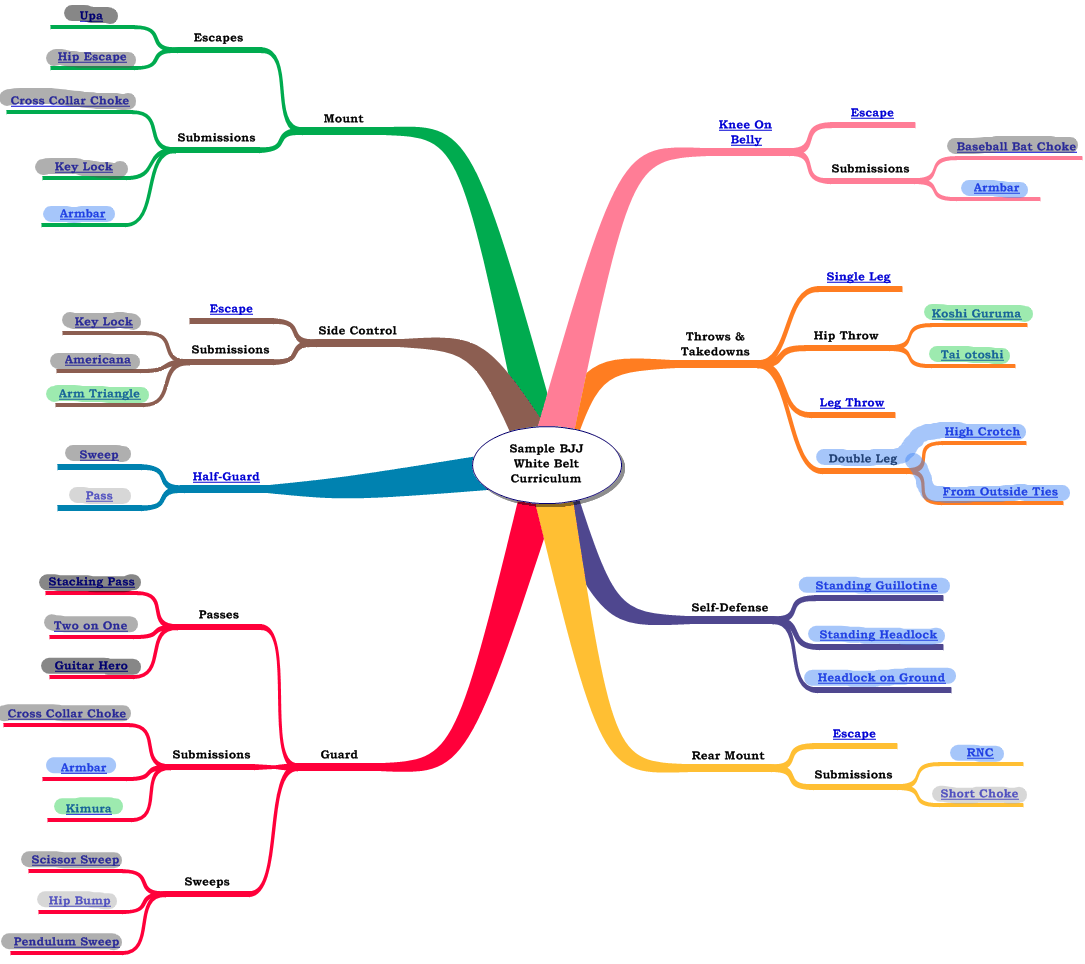

## 1. Install Dependencies

In [ ]:
!pip install tensorflow opencv-python matplotlib
!pip install keras

In [ ]:
!pip list

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import os
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import imghdr
import numpy as np

## 2. Configure Setup

In [1]:
# # *** This only works natively with NVIDIA gpus
# Avoid Out of Memory errors by enabling VRAM consumption growth
# gpu = tf.config.experimental.list_physical_devices('gpu')
# tf.config.experimental.set_memory_growth(gpu, True)

## 3. Configure Data

#### Remove unwanted images

In [10]:
data_dir = "../JiuJitsuAI/Data"
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

#### Test a mock batch of data

In [48]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1444 files belonging to 7 classes.


In [44]:
# data = data.map(lambda x,y: (x/255, y)) - scale images

In [49]:
data_iterator = data.as_numpy_iterator()

In [50]:
batch = data_iterator.next()

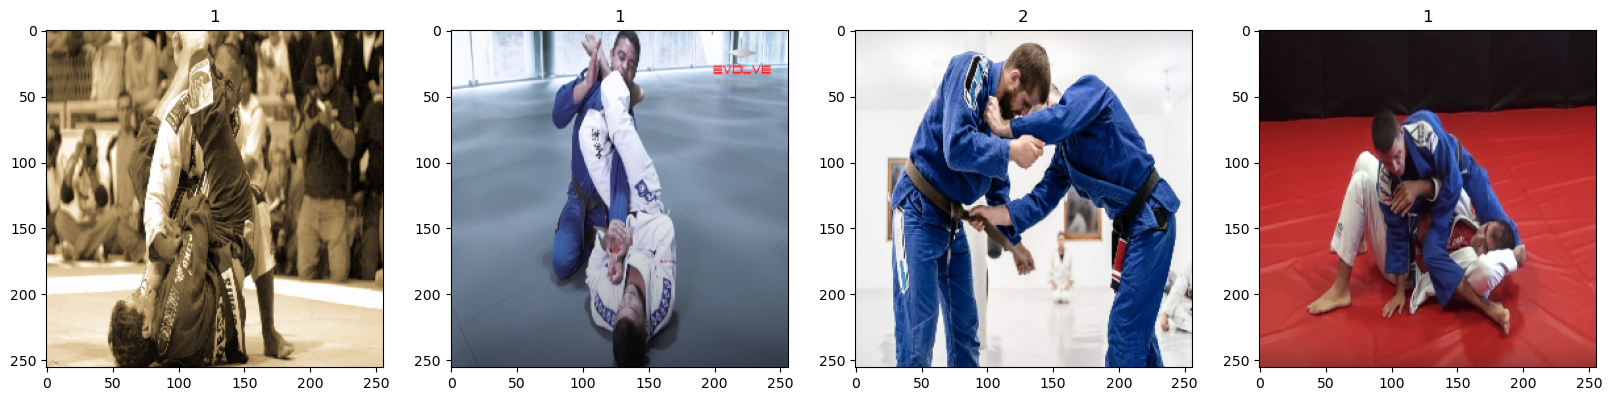

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])